## Boosting and Gradient Boosting
- **scikit-learn** implements gradient boosting algorithm for both regression and classification.
They are 
- GradientBoostingRegressor
- GradientBoostingClassifier

, both in the ensemble sub-package

In [1]:
import numpy as np
import pandas as pd
import sklearn.ensemble
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

# In the following, we discuss GradientBoostingRegressor first
- We use the **Boston** housing data set to train our gradient boosting model
- We have discussed **Boston** dataset in the multiple linear regression lecture code

In [3]:
from sklearn import datasets
boston = datasets.load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
Y = pd.Series(boston.target, name='price')

In [4]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

In [5]:
gbm = GradientBoostingRegressor()

## The Hyperparameters of Gradient Boosting Model
A boosting tree is an ensemble of trees, thus it inherits all the hyperparameters of decision trees

- max_depth: max tree height, default value 3
- max_leaf_nodes
- min_samples_leaf
- min_samples_split
- min_impurity_decrease
- min_impurity_split
- criterion: the criterion for tree splitting, defaulted to **friedman_mse**.    **friedman_mse** is the same as 
    **mse** (mean square error) when the loss function is chosen to be **ls** (least square)

As with all tree based model, boosting trees output 
- feature\_importances\_

On the other hand, there are **ensemble**-specific hyperparameters
- n_estimators: the number of trees, default value 100
- learning_rate: the shrinkage/discount factor, default value 0.1
- subsamples: the sample count in term of percentage used for a single tree training
- max_features: the integer or percentage count of the number of random feature selected for one tree node
    
Besides the regular **predict** method, the boosting tree has its own
- staged_predict: this method returns a generator. After kth next function call on the generator, 
    it spits out the predicted values after k-th boosting iteration
- estimators_: it stores all the n_estimators trees used in building the boosting tree ensemble    
                                                                                                            

In [ ]:
#dpg stopping rules

#the ensemble specific hpyerparamaters are the hyperparamaters unique to gradient boosting ??

#max leaf nodes tells if size of node is not smaller than this number you keep splitting



# max_depth: max tree height, default value 3 #dpg how big want tree to be
    
# min_impurity_decrease #dpg must decreases for a certain amount for tree to split

# min_impurity_split #dpg make sure not too big #


# criterion  #dpg although for regression it's MSE 
#            #dpg for classification it is something other than gini or deviance
#if do classification go with friedman MSE which is the impurity 

In [ ]:
#from Luke

#  min_impurity_decrease ->>  impurity has to be reduced by a certain amount otherwise learning process stopped ; 
#  If you set this to be too big, your learning process will stop; be careful

#  min_impurity_split ->> make sure that this is not too big so that splitting will happen

# feature importance pretty much how much reduces error same basic idea

# can do cross validation to determine number of trees, learning rate, subsamples 

# subsample can specify percentage that you would like to use like in bagging

# max features how many random features like in random forest

In [6]:
gbm.fit(X,Y)

GradientBoostingRegressor()

In [8]:
# R^2 of the fit
gbm.score(X,Y)

0.9761405838418584

- To visualize the iterative process, we can turn on the verbose parameter

In [7]:
gbm.set_params(verbose=1)

GradientBoostingRegressor(verbose=1)

In [8]:
gbm.fit(X,Y)

      Iter       Train Loss   Remaining Time 
         1          71.3024            0.15s
         2          60.6243            0.18s
         3          51.6694            0.19s
         4          44.3657            0.17s
         5          38.2831            0.17s
         6          33.2863            0.15s
         7          28.9190            0.14s
         8          25.2967            0.13s
         9          22.2587            0.14s
        10          19.6923            0.13s
        20           8.3119            0.06s
        30           5.4763            0.07s
        40           4.1906            0.07s
        50           3.4663            0.05s
        60           3.0437            0.04s
        70           2.6753            0.03s
        80           2.4451            0.02s
        90           2.2376            0.01s
       100           2.0142            0.00s


GradientBoostingRegressor(verbose=1)

## Tuning

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train_reg, X_test_reg, Y_train_reg, Y_test_reg = train_test_split(X,Y, test_size=0.3, random_state=0)

In [11]:
def tune_gbm(learning_rate, max_depth):  #luke learnign rate(lambda) to control how aggressive learning is and control depth
    gbm = GradientBoostingRegressor(
        learning_rate=learning_rate, n_estimators=10000, max_depth=max_depth)
    gbm.fit(X_train_reg,Y_train_reg)
    
    return gbm


def demo_gbm_tuning(model, start=0, end=10000, training_curve=True):
    gen_train = model.staged_predict(X_train_reg)
    gen_test  = model.staged_predict(X_test_reg)  #dpg why is this a generator??

    trainMSE = []
    testMSE  = []
    steps   = range(1,10001)
    for n in steps:  #luke want to get learning curve
        y_pred_train = next(gen_train)
        y_pred_test  = next(gen_test)
        trainMSE.append(mean_squared_error(y_pred_train, Y_train_reg))
        testMSE.append(mean_squared_error(y_pred_test, Y_test_reg))
    
    print("The best test score is {:.2f} at the step {}".format(
        min(testMSE), np.argmin(testMSE)+1))  #testMSE is a list that you get the minimum value of
    print('-'*50)                             #np.argmin is giving you the index of smallest mse
    plt.plot(range(start, end), testMSE[start:end])
    if training_curve:
        plt.plot(range(start, end), trainMSE[start:end])

In [12]:
learning_rate=0.001
max_depth=4  #dpg default is 3

model1 = tune_gbm(learning_rate, max_depth)

The best test score is 14.12 at the step 10000
--------------------------------------------------


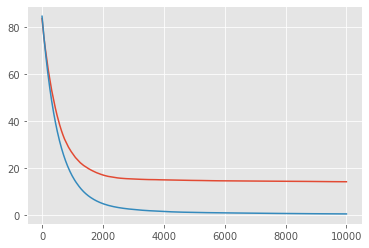

In [14]:
start = 0
end = 10000 # You may change start and end to zoom in

demo_gbm_tuning(model1, start, end)

In [ ]:
#from Luke about above graph

#learning curve is the blue one 
#haven't hit the sweet spot we are underfitting use bigger learning rate 

#dpg -  how do you know that you are overfitting or underfitting?




#as an aside #if overfitting to reduce learning rate reduce max depth

In [15]:
learning_rate=0.05
max_depth=4

model2 = tune_gbm(learning_rate, max_depth)

The best test score is 13.38 at the step 873
--------------------------------------------------


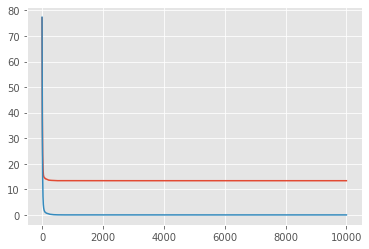

In [16]:
start = 0
end = 10000
# You may change start and end to zoom in

demo_gbm_tuning(model2, start, end)

In [ ]:
#from Luke about above graph

#learning rate is higher at 0.05, 

# less steps and test score is lower - that means that we hit the sweet spot

The best test score is 12.96 at the step 559
--------------------------------------------------


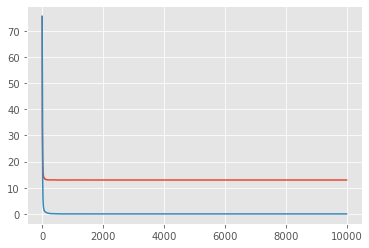

In [13]:
learning_rate=0.062
max_depth=4

model3 = tune_gbm(learning_rate, max_depth)

start = 0
end = 10000
# You may change start and end to zoom in

demo_gbm_tuning(model3, start, end)

The best test score is 12.96 at the step 559
--------------------------------------------------


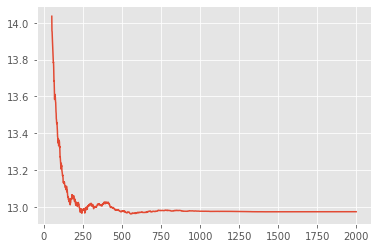

In [15]:
demo_gbm_tuning(model3, 50, 2000, training_curve=False)

- We can investigate the feature importance of gbm with 10,000 trees.

In [16]:
sorted_importance = sorted(zip(boston.feature_names, gbm.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('RM', 0.41091106864140403),
 ('LSTAT', 0.37273669393240677),
 ('DIS', 0.08267492567880567),
 ('NOX', 0.036393400471139335),
 ('PTRATIO', 0.03469488936746957),
 ('CRIM', 0.026870068664422684),
 ('TAX', 0.011800232240179885),
 ('B', 0.01042491443306994),
 ('AGE', 0.008926920992508523),
 ('INDUS', 0.002057522111308502),
 ('RAD', 0.0013027694210627613),
 ('CHAS', 0.0008727466610932129),
 ('ZN', 0.0003338473851290125)]

Text(0.5, 1.0, 'Feature Importance Plot of 500-Tree GBM')

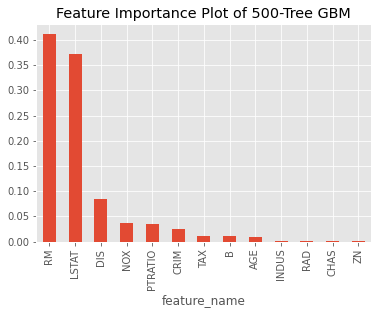

In [20]:
a, b = zip(*sorted_importance) # this splits the list of tuples into two lists
pd.DataFrame({'feature_name':a, 'importance_score':b}).plot.bar(x='feature_name',y='importance_score', legend=None)
plt.title('Feature Importance Plot of 500-Tree GBM')

## The Feature Importance Varying Against the Number of Trees
- In the above analysis, we only investigate the feature importance scores for the final model
- It would be interesting to investigate the variations of these feature importances against the growth of number of trees
- We will need to store the intermidiate gbm models when we vary the n_estimators
- To do so properly, we will need to use the package **copy** and its **deepcopy** function

In [21]:
from copy import deepcopy

gbm_models   = []
warm_start   = False
steps        = list(range(1,501,50))

for n_estimators in steps:
    gbm.set_params(n_estimators=n_estimators, learning_rate=0.1, warm_start=warm_start)
    gbm_models.append(deepcopy(gbm.fit(X_train_reg, Y_train_reg))) 
    warm_start = True

      Iter       Train Loss   Remaining Time 
         1          71.0569            0.00s
      Iter       Train Loss   Remaining Time 
         2          60.1108            0.05s
         3          51.0972            0.05s
         4          43.4785            0.05s
         5          37.2485            0.05s
         6          32.0757            0.05s
         7          27.7741            0.05s
         8          24.2563            0.05s
         9          21.1532            0.05s
        10          18.4675            0.05s
        11          16.3522            0.04s
        21           6.5138            0.04s
        31           4.0656            0.02s
        41           2.9189            0.01s
        51           2.3874            0.00s
      Iter       Train Loss   Remaining Time 
        52           2.3556            0.05s
        53           2.3312            0.05s
        54           2.2886            0.05s
        55           2.2502            0.05s
       

In [22]:
boston_importance = pd.DataFrame([model.feature_importances_ for model in gbm_models], index=steps, columns=X_train_reg.columns)
boston_importance

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
1,0.073302,0.000000,0.000000,0.000000,0.000000,0.666492,0.000000,0.057862,0.000000,0.000000,0.022394,0.000000,0.179949
51,0.042198,0.000000,0.004862,0.000524,0.011856,0.448684,0.003086,0.052409,0.002403,0.014441,0.051643,0.008371,0.359523
101,0.043022,0.000029,0.005473,0.000686,0.013092,0.444948,0.005055,0.053530,0.002629,0.014922,0.051222,0.009550,0.355840
151,0.043633,0.000052,0.005584,0.000706,0.013570,0.443337,0.006107,0.053727,0.002707,0.015014,0.051083,0.009967,0.354513
201,0.044210,0.000095,0.005592,0.000713,0.013750,0.442190,0.006729,0.053902,0.002756,0.015092,0.050975,0.010435,0.353561
251,0.044494,0.000120,0.005682,0.000712,0.013820,0.441497,0.007011,0.054082,0.002778,0.015116,0.050875,0.010769,0.353044
301,0.044626,0.000131,0.005729,0.000711,0.013860,0.441145,0.007159,0.054189,0.002812,0.015138,0.050823,0.010868,0.352808
351,0.044771,0.000136,0.005737,0.000711,0.013878,0.440985,0.007232,0.054220,0.002827,0.015143,0.050797,0.010946,0.352617
401,0.044840,0.000152,0.005741,0.000713,0.013897,0.440838,0.007292,0.054261,0.002829,0.015159,0.050783,0.010979,0.352516
451,0.044872,0.000156,0.005742,0.000713,0.013915,0.440753,0.007336,0.054295,0.002829,0.015168,0.050774,0.011002,0.352444


Text(0, 0.5, 'feature importance')

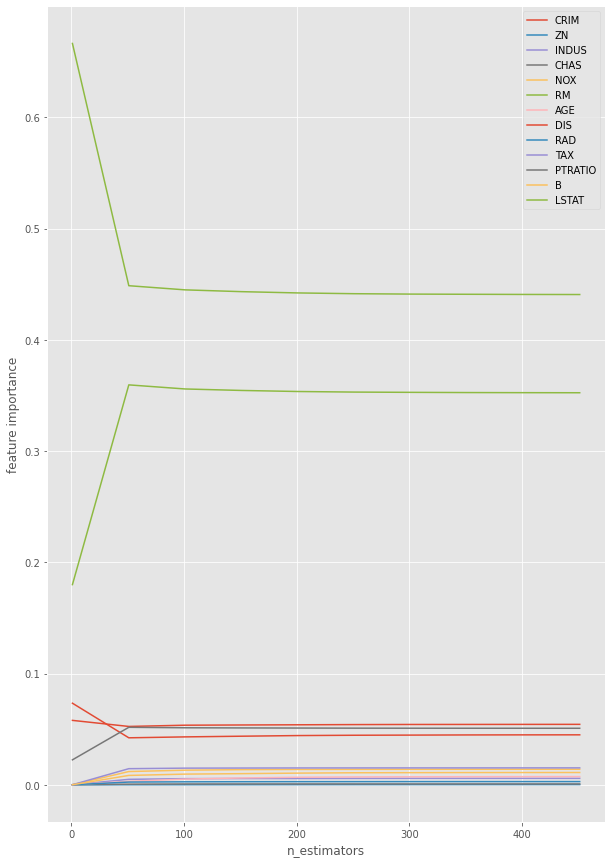

In [23]:
plt.rcParams['figure.figsize'] = (10,15)
for feature in boston_importance.columns:
    plt.plot(boston_importance.index, boston_importance[feature], label=feature)
plt.legend(loc=1)    
plt.xlabel('n_estimators')
plt.ylabel('feature importance')

## Gradient Boosting Classifier
- Besides all the hyperparameters/methods with regression boosting trees, it has its own
**staged_predict_proba** to output the per-class probabilities as a generator
- We will demonstrate the usage of gbm classifier using UCI credit-card default prediction data

In [18]:
cards = pd.read_csv('./UCI_Credit_Card.csv')

In [19]:
print(cards.columns)
cards.head()

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## The columns of the UCI credit card default data
- ID: sample id
- LIMIT_BAL: credit limit
- SEX: gender
- EDUCATION: 1-6, 1 for graduate school, lower means higher education
- MARRIAGE: 1/married, 2/single, 3/others
- AGE
- PAY_i: the months of past due, -1 for paying on time
- BILL_AMTi: the bill of the previous ith month
- PAY_AMTi: the payment of the previous ith month
- default.payment.next.month: whether the card holder defaults the next month, this is the target
    
the data was collected in 2005 in Taiwan for half a year duration. It has 30000 sample points, which is highly imbalanced.    

In [20]:
cards['default.payment.next.month'].value_counts()  # default vs non-default is about 1:4

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [21]:
X = cards.drop('default.payment.next.month', axis=1)
Y = cards['default.payment.next.month']
gbm_c = GradientBoostingClassifier()
gbm_c.fit(X,Y)
gbm_c.score(X,Y)

0.8249666666666666

- The high accuracy mostly comes from predicting the majority class, which is trivial

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, gbm_c.predict(X))

array([[22262,  1102],
       [ 4149,  2487]], dtype=int64)

## Up-Sampling the Minority Class
- One technique to train an imbalanced classification model is to fabricate synthesized minority class data, knowning as
**up-sampling**. Up-sampling bootstraps only the minority class samples to make the major:minor ratio more balanced

In [23]:
from sklearn.utils import resample
minorIndex = cards[cards['default.payment.next.month']==1].ID.values
minorIndex

array([    1,     2,    14, ..., 29998, 29999, 30000], dtype=int64)

In [37]:
resampled = resample(minorIndex, n_samples = 23364-6636)
LEFT = pd.DataFrame(list(cards.ID) + list(resampled), columns=['INDEX'])
LEFT.shape

(46728, 1)

In [27]:
cards2 = pd.merge(LEFT, cards, how='left', left_on ='INDEX', right_on='ID')

In [28]:
X = cards2.drop(['default.payment.next.month','ID','INDEX'],axis=1)
Y = cards2['default.payment.next.month']

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [31]:
np.random.seed(50)
gbm_c.set_params(learning_rate=0.01, n_estimators=3000, max_depth=2, subsample=0.3, max_features=3, verbose=0)
gbm_c.fit(X_train, Y_train)
print('Training Accuracy %.2f' %(gbm_c.score(X_train, Y_train)))
print('Testing Accuracy %.2f' %(gbm_c.score(X_test, Y_test)))

Training Accuracy 0.73
Testing Accuracy 0.72


In [34]:
print(confusion_matrix(Y_train, gbm_c.predict(X_train)))

[[13010  3311]
 [ 5650 10738]]


In [36]:
print(confusion_matrix(Y_test, gbm_c.predict(X_test)))

[[5569 1474]
 [2464 4512]]


## Barplot of Feature Importance

In [37]:
importance = sorted(list(zip(X_train.columns, list(gbm_c.feature_importances_))), key=lambda t:t[1], reverse=True)

Text(0.5, 1.0, 'feature importance of a gbm classifier')

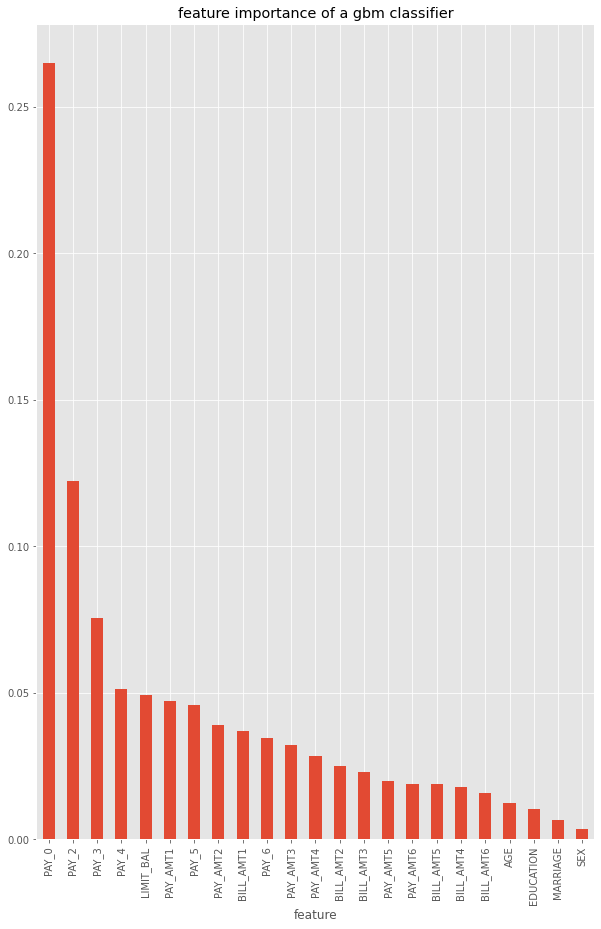

In [38]:
a, b = zip(*importance)
importance_score = pd.DataFrame({'feature':a, 'score':b})
importance_score.plot.bar(x='feature', y='score', legend=None)
plt.title('feature importance of a gbm classifier')

## How Well Do the Boosting Trees Estimate the Probabilities?
- We may compare the output from staged predict_proba to the sample probabilities of class 1 (when the classes are 0 and 1, the 
expectation value/average is equal to class 1 probability)

In [39]:
steps = [1, 50, 100, 200, 400, gbm_c.n_estimators]
gen_proba = gbm_c.staged_predict_proba(X)

totalFrame = None

for n_estimators in range(1, steps[-1]+1):
    probs = next(gen_proba)[:,1]
    if n_estimators not in steps: continue
    prob_bin = pd.cut(probs, 50, labels=False)
    df    = pd.DataFrame({'prob_bin':prob_bin, 'probs':probs, 'target':Y})
    ans   = df.groupby('prob_bin').mean()
    ans['n_estimators'] = np.ones(ans.shape[0], dtype=np.int32) * n_estimators
    totalFrame = ans.copy() if totalFrame is None else \
    pd.concat([totalFrame, ans], axis=0)                  

In [40]:
totalFrame.head()

,probs,target,n_estimators
prob_bin,,,
0,0.500161,0.408858,1
15,0.501533,0.538373,1
40,0.503705,0.775425,1
49,0.504502,0.841090,1
0,0.439660,0.230224,50


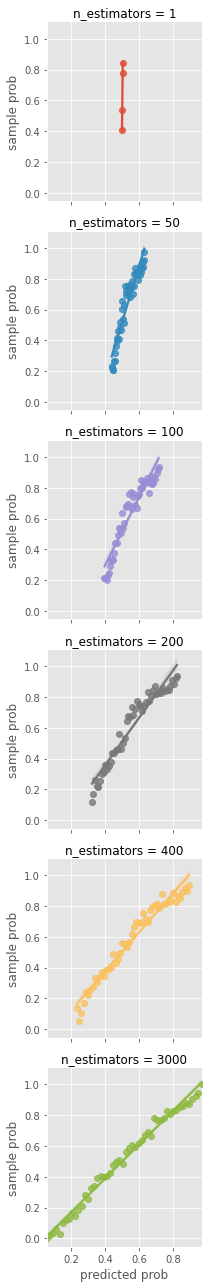

In [41]:
plt.rcParams['figure.figsize'] = (3,3)
import seaborn as sns 
totalFrame.columns = ['predicted prob', 'sample prob', 'n_estimators']
g = sns.FacetGrid(data=totalFrame, row = 'n_estimators', hue = 'n_estimators')
g.map(sns.regplot, 'predicted prob', 'sample prob')
plt.rcParams['figure.figsize'] = (8,8)

- The above motion picture demonstrates that at the beginning (n_estimators = 1) the model estimates the probabilities poorly
- As we add more and more trees to the boosted model, the slopes of sample probabilities vs estimated probabilities approach 1
- We also notice that the range of estimated probabilities grow from a small range near 0.5 to the full range (0,1)

### Partial Dependence Plot
- One can use the sklearn's built-in **partial-dependence plot** function to investigate the feature's infleuences on the default probabilities or the interactions of pairs of features on the default rates.

In [42]:
version = sklearn.__version__
if version[:4]<'0.21':
     from sklearn.ensemble.partial_dependence import plot_partial_dependence
     # will be removed after sklearn '0.23'
else:
     from sklearn.inspection import plot_partial_dependence

In [43]:
sorted(zip(X.columns, gbm_c.feature_importances_), key=lambda t:t[1], reverse=True)

[('PAY_0', 0.2650907876835829),
 ('PAY_2', 0.12242247820364374),
 ('PAY_3', 0.07565885273891042),
 ('PAY_4', 0.051240941820537934),
 ('LIMIT_BAL', 0.0492836012246305),
 ('PAY_AMT1', 0.04727686147770452),
 ('PAY_5', 0.04590123144713079),
 ('PAY_AMT2', 0.03916099827939664),
 ('BILL_AMT1', 0.03695111123423296),
 ('PAY_6', 0.03441389682719953),
 ('PAY_AMT3', 0.032227000576878814),
 ('PAY_AMT4', 0.02832225718373593),
 ('BILL_AMT2', 0.0250814920777287),
 ('BILL_AMT3', 0.023110063111650907),
 ('PAY_AMT5', 0.019834550548227563),
 ('PAY_AMT6', 0.018841330100350766),
 ('BILL_AMT5', 0.0187239421624236),
 ('BILL_AMT4', 0.01791360129844614),
 ('BILL_AMT6', 0.015640932491088836),
 ('AGE', 0.012366179384111805),
 ('EDUCATION', 0.010288631006344588),
 ('MARRIAGE', 0.006660093858823113),
 ('SEX', 0.0035891652632192156)]

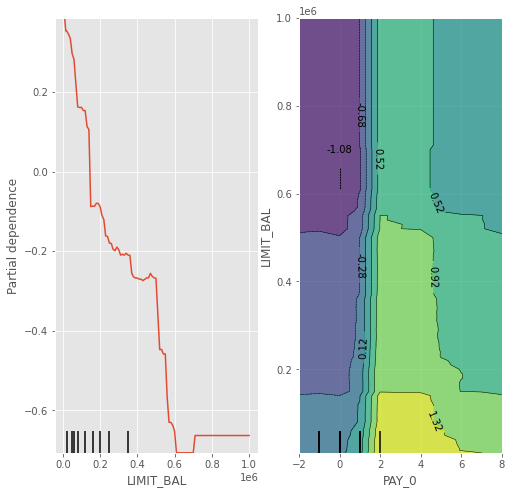

In [44]:
features = ['LIMIT_BAL', ('PAY_0', 'LIMIT_BAL')]
plot_partial_dependence(gbm_c, X, features, feature_names=X.columns.tolist())

### Remark
- In running **pdp**, we assume that the feature we focus on (**LIMIT_BAL** in our case)
has no correlations with all the other features.
- The plot on the left indicates the dependence of default probabilities
to the continuous feature **LIMIT_BAL**.
- The plot does show a decreasing trend where the default rates continue to drop
with increasing credit limit.
- The **PDP** also catures correctly the slowing down of the decrease.
- Both are consistent with our own analysis.
- A bonus of **pdp** is that the barcode at the bottom left corner indicates
the density of the **LIMIT_BAL** distribution, which helps us to prevent
over-interpreting the plot when the samples are sparse in the particular range.
- What is counter-intuitive is that the **pdp** allows the default rate to
drop below 0, which is impossible.
- This is because that **pdp** makes use of the gradient boosting **predict_proba**
function on sythesized samples which are far away from the domain of the train set.
- The right hand side contour plot shows the interaction pattern of the two features we specify, 
**LIMIT_BAL** and **PAY_0**.


### Pros and Cons of PDP
- Easy and intuitive to use. Can study the interaction between features.
- Do not need to write customized code.


- Can produce counter-intuitive result when the features have strong inter-correlation.